<a href="https://colab.research.google.com/github/SurekhaBerlin/Tata-Data-Visualization-Project/blob/main/TataOnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tata Online Retail Data Analysis




## STEP 0 : Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/Online Retail.xlsx')

## STEP 1: Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## STEP 2: Data Preparation
Need to perform the following steps to clean this data.

* Create a check that the quantity should not be below 1 unit
* Create a check that the Unit price should not be below $0
* Checking for duplicates and removing it
* Checking for null values and removing it
* Dropping irrelevant rows and columns


In [8]:
# Finding the duplicates
duplicates = df.duplicated().sum()
duplicates

5268

In [9]:
# Dropping the duplicated columns
df = df.drop_duplicates()

In [10]:

duplicates = df.duplicated().sum()
duplicates

0

In [11]:
# Finding the null values in the CustomerID
df['CustomerID'].isna().sum()

135037

In [12]:
# check for nan customer ids
mask = np.isinf(df['CustomerID']) | np.isnan(df['CustomerID'])
df.loc[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [13]:
# Replacing infinity and empty rows with zero for easier removal
df['CustomerID'] = df['CustomerID'].fillna(0).replace(float('inf'),0)

In [14]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,11435.904653
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,0.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,0.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,14336.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16241.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,6795.044250


In [17]:
# Checking for rows with zero CustomerID
df[df['CustomerID']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,0,United Kingdom


In [18]:
# Removing rows with zero CustomerID
df.drop(df[df['CustomerID']<1].index, inplace=True)

In [19]:
# Checking for rows with zero Quantity
df[df['Quantity']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [20]:
# Removing rows with zero Quantity
df.drop(df[df['Quantity']<1].index,inplace=True)

In [21]:
# Checking for rows with zero UnitPrice
df['UnitPrice'] < 0.0001

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: UnitPrice, Length: 392732, dtype: bool

In [22]:
df.drop(df[df['UnitPrice'] < 0.0001].index,inplace=True)

In [23]:
df['CustomerID'].unique()

array([17850, 13047, 12583, ..., 13298, 14569, 12713])

In [24]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [26]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [27]:
df['Country'].nunique()

37

In [28]:
df[df['Country'] == 'Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2011-08-22 13:32:00,16.95,14265,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2011-08-22 13:32:00,1.69,14265,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2011-08-22 13:32:00,8.25,14265,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2011-08-22 13:32:00,6.65,14265,Unspecified


In [29]:
# Removing rows with unspecified countries
df.drop(df[df['Country'] == 'Unspecified'].index,inplace=True)

## Step 3: Data Modelling


* Renaming columns
* Feature Creation

In [30]:
# To create a new column for 'Revenue' by multiplying the Quantity and Price
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Revenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 392451, dtype: float64

In [31]:
# To create a new column for 'Profit' by Subtracting the Price from Revenue
df['Profit'] = df['Revenue'] - df['UnitPrice']
df['Profit']

0         12.75
1         16.95
2         19.25
3         16.95
4         16.95
          ...  
541904     9.35
541905    10.50
541906    12.45
541907    12.45
541908     9.90
Name: Profit, Length: 392451, dtype: float64

In [32]:
# Creating a Year and Month column
import datetime as dt
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.strftime('%B')  #%B for full month name.
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Profit,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12.75,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,16.95,2010,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,19.25,2010,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,16.95,2010,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,16.95,2010,December
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,9.35,2011,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,10.50,2011,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12.45,2011,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12.45,2011,December


In [33]:
# Checking their data types
df[['Year','Month']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 392451 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Year    392451 non-null  int32 
 1   Month   392451 non-null  object
dtypes: int32(1), object(1)
memory usage: 7.5+ MB


In [34]:

# Converting the Year column to date
df['Year'] = pd.to_datetime(df['Year'])

In [35]:
df[['Year','Month']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 392451 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Year    392451 non-null  datetime64[ns]
 1   Month   392451 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 9.0+ MB


In [36]:

# Dropping UK from the Country column

df.drop(df[df['Country']=='United Kingdom'].index,inplace=True)

In [37]:
df['Country'].unique()

array(['France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE',
       'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Israel', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [38]:
# To show number of entries for each Country
df['Country'].value_counts()

Country
Germany                 9025
France                  8326
EIRE                    7226
Spain                   2479
Netherlands             2359
Belgium                 2031
Switzerland             1841
Portugal                1453
Australia               1181
Norway                  1071
Italy                    758
Channel Islands          747
Finland                  685
Cyprus                   603
Sweden                   450
Austria                  398
Denmark                  380
Poland                   330
Japan                    321
Israel                   245
Singapore                222
Iceland                  182
USA                      179
Canada                   151
Greece                   145
Malta                    112
United Arab Emirates      68
European Community        60
RSA                       57
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic            25
Bahrain                   17
Saudi 

In [39]:
df['Revenue'].value_counts()

Revenue
15.0     3080
19.8     1661
17.7     1659
10.2     1472
16.5     1225
         ... 
489.0       1
68.4        1
10.8        1
121.8       1
71.7        1
Name: count, Length: 1138, dtype: int64

In [40]:
df['Revenue'].describe()

count    43248.000000
mean        36.984912
std         87.544593
min          0.210000
25%         13.200000
50%         17.700000
75%         30.000000
max       4992.000000
Name: Revenue, dtype: float64

In [41]:
# Checking how many less than 1 revenues we have
(df['Revenue']< 1).sum()

189

In [42]:
# Viewing to confirm that they are non zero
df[df['Revenue' ]< 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Profit,Year,Month
21570,538095,84692,BOX OF 24 COCKTAIL PARASOLS,1,2010-12-09 14:55:00,0.42,17097,Spain,0.42,0.00,1970-01-01 00:00:00.000002010,December
21572,538095,40001,WHITE BAMBOO RIBS LAMPSHADE,1,2010-12-09 14:55:00,0.85,17097,Spain,0.85,0.00,1970-01-01 00:00:00.000002010,December
32259,539050,20983,12 PENCILS TALL TUBE RED RETROSPOT,1,2010-12-15 16:21:00,0.85,12577,France,0.85,0.00,1970-01-01 00:00:00.000002010,December
32265,539050,21901,"KEY FOB , BACK DOOR",1,2010-12-15 16:21:00,0.65,12577,France,0.65,0.00,1970-01-01 00:00:00.000002010,December
32266,539050,21900,"KEY FOB , SHED",1,2010-12-15 16:21:00,0.65,12577,France,0.65,0.00,1970-01-01 00:00:00.000002010,December
...,...,...,...,...,...,...,...,...,...,...,...,...
535255,581193,22391,PAPERWEIGHT HOME SWEET HOME,2,2011-12-07 17:05:00,0.39,17097,Spain,0.78,0.39,1970-01-01 00:00:00.000002011,December
535257,581193,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,2,2011-12-07 17:05:00,0.42,17097,Spain,0.84,0.42,1970-01-01 00:00:00.000002011,December
535259,581193,22755,SMALL PURPLE BABUSHKA NOTEBOOK,1,2011-12-07 17:05:00,0.21,17097,Spain,0.21,0.00,1970-01-01 00:00:00.000002011,December
535260,581193,22753,SMALL YELLOW BABUSHKA NOTEBOOK,1,2011-12-07 17:05:00,0.21,17097,Spain,0.21,0.00,1970-01-01 00:00:00.000002011,December


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43248 entries, 26 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    43248 non-null  object        
 1   StockCode    43248 non-null  object        
 2   Description  43248 non-null  object        
 3   Quantity     43248 non-null  int64         
 4   InvoiceDate  43248 non-null  datetime64[ns]
 5   UnitPrice    43248 non-null  float64       
 6   CustomerID   43248 non-null  object        
 7   Country      43248 non-null  object        
 8   Revenue      43248 non-null  float64       
 9   Profit       43248 non-null  float64       
 10  Year         43248 non-null  datetime64[ns]
 11  Month        43248 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 4.3+ MB


In [44]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Profit', 'Year',
       'Month'],
      dtype='object')

In [45]:
# Total Revenue
total_Rev = df['Revenue'].sum()
total_Rev

1599523.4800000002

In [46]:
# Total Profit
total_prof = df['Profit'].sum()
total_prof

1410723.91

In [47]:
# Total Units Sold
total_units = df['Quantity'].sum()
total_units

908912

In [48]:
# Total Unit price
total_price = df['UnitPrice'].sum()
total_price


188799.57

In [49]:
total_difference = total_Rev - total_price
total_difference

1410723.9100000001

In [50]:
# Creating a dataframe to show countries and revenue alone
df1 = ['Country', 'Revenue']
df1 = df[df1].copy()
df1

,Country,Revenue
26,France,90.00
27,France,90.00
28,France,45.00
29,France,10.20
30,France,15.60
...,...,...
541904,France,10.20
541905,France,12.60
541906,France,16.60
541907,France,16.60


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43248 entries, 26 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    43248 non-null  object        
 1   StockCode    43248 non-null  object        
 2   Description  43248 non-null  object        
 3   Quantity     43248 non-null  int64         
 4   InvoiceDate  43248 non-null  datetime64[ns]
 5   UnitPrice    43248 non-null  float64       
 6   CustomerID   43248 non-null  object        
 7   Country      43248 non-null  object        
 8   Revenue      43248 non-null  float64       
 9   Profit       43248 non-null  float64       
 10  Year         43248 non-null  datetime64[ns]
 11  Month        43248 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 4.3+ MB


## Step 4: Data Analysis

In [52]:

# Group by Country and calculate total revenue
country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

# Sort by Revenue in descending order and select top 10
top_10_revenue = country_revenue.sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 Revenues by Country:")
print(top_10_revenue)

Top 10 Revenues by Country:
        Country    Revenue
23  Netherlands  285446.34
10         EIRE  265262.46
14      Germany  228678.40
13       France  208934.31
0     Australia  138453.81
30        Spain   61558.56
32  Switzerland   56443.95
3       Belgium   41196.34
31       Sweden   38367.83
19        Japan   37416.37


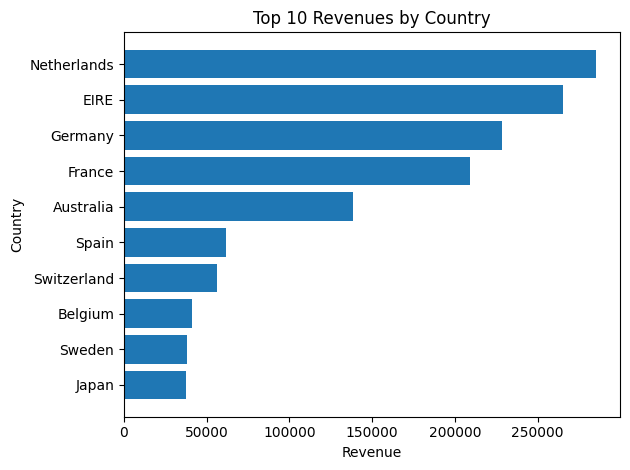

In [53]:
# Plotting the horizontal bar plot

plt.barh(top_10_revenue['Country'], top_10_revenue['Revenue'])
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.title('Top 10 Revenues by Country')
plt.gca().invert_yaxis()  # Invert y-axis to display countries from top to bottom
plt.tight_layout()
plt.show()

In [54]:
# Selecting columns 'Country' and 'Quantity' into a new DataFrame u
unit_df = df[['Country', 'Quantity']].copy()

# Displaying the new DataFrame u
print(unit_df)

       Country  Quantity
26      France        24
27      France        24
28      France        12
29      France        12
30      France        24
...        ...       ...
541904  France        12
541905  France         6
541906  France         4
541907  France         4
541908  France         3

[43248 rows x 2 columns]


In [55]:
# To show units sold per Country
unit = unit_df.groupby(unit_df['Country']).sum().sort_values('Quantity', ascending=False).head(10)
unit

,Quantity
Country,
Netherlands,200361
EIRE,140133
Germany,119154
France,111428
Australia,83891
Sweden,36078
Switzerland,30082
Spain,27933
Japan,26016


Text(0.5, 1.0, 'Top 10 Countries by Units sold')

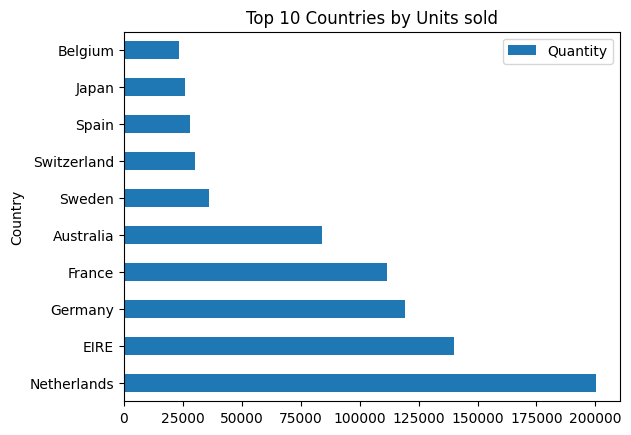

In [56]:
# showing it using a bar Chart

unit.plot(kind = 'barh')
plt.title('Top 10 Countries by Units sold')

In [57]:
# Creating a dataframe to show Customers and their Revenue alone

c = ['CustomerID', 'Revenue']
c = df[c].copy()
c

,CustomerID,Revenue
26,12583,90.00
27,12583,90.00
28,12583,45.00
29,12583,10.20
30,12583,15.60
...,...,...
541904,12680,10.20
541905,12680,12.60
541906,12680,16.60
541907,12680,16.60


In [58]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43248 entries, 26 to 541908
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  43248 non-null  object 
 1   Revenue     43248 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1013.6+ KB


In [59]:
# To show units sold per Country

cust = c.groupby(c['CustomerID']).sum().sort_values('Revenue',ascending=False).head(10)
cust

,Revenue
CustomerID,
14646,280206.02
14911,143711.17
12415,124914.53
14156,117210.08
17404,31906.82
12753,21429.39
12744,21279.29
12471,19788.65
12731,18895.91


Text(0.5, 1.0, 'Top 10 Customers by Revenue')

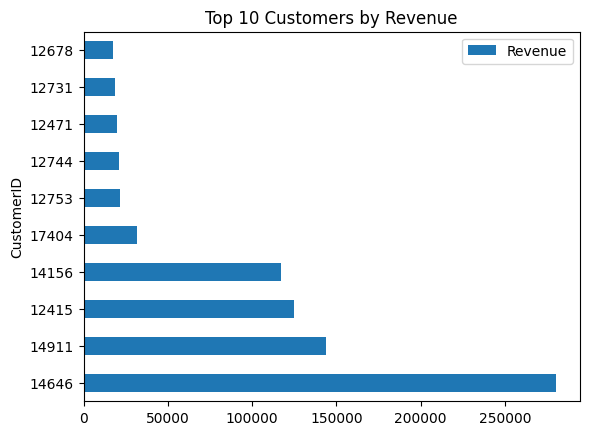

In [60]:
# showing it using a bar Chart

cust.plot(kind='barh')
plt.title('Top 10 Customers by Revenue')

In [61]:
# Converting to CSV

df.to_csv('Online Retail data.csv', index = False)

In [62]:

# Importing library to allow download of files

from google.colab import files

files.download('Online Retail data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>